In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144618 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [3]:
!ls

adc.json  drive  sample_data


In [4]:
cd drive

/content/drive


In [5]:
!ls

'My Drive'


In [6]:
cd My Drive

/content/drive/My Drive


In [7]:
!ls

'Adsız doküman.gdoc'
'Colab Notebooks'
 hQoj8Kv90mxikLVaioNizYnBDj5HUWlttFSoS3eYPFqCI_zqj5t91q28WwQQTKB50.gdoc
 hQoj8Kv90mxikLVaioNizYnBDj5HUWlttFSoS3eYPFqCI_zqj5t91q28WwQQTKB50.pdf
 Keras_ile_Derin_Ogrenmeye_Giris
'odev (1) (1) (1).deneme'
'[RAPOR] EDL-rapor03.doc'
'[RAPOR] EDL-rapor03-dönüştürüldü.pdf'
 Udemy_DerinOgrenmeyeGiris
 VeriArtırma


In [8]:
cd VeriArtırma

/content/drive/My Drive/VeriArtırma


In [9]:
!ls

 Artirilmis_Veri       hababam.jpg   veriartirma_1.ipynb
'billie holiday.jpg'   park.png      veriartirma_2.ipynb


## CIFAR veri kümesi ile veri artrırma orenekleri ve gorsellesştirme

In [10]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
import numpy as np


In [12]:
# veriyi indirme ve  eğitim test kümerlerini  rastgele olusturma

(X_train,y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_test/= 255
X_train/= 255


170500096/170498071 [==============================] - 10s 0us/step


#### orjinal goruntuler

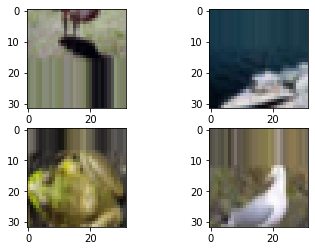

In [15]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train , batch_size =4 , seed =499):
  for i in range(0,4):
    pyplot.subplot(220 +1+i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

# Döndurme

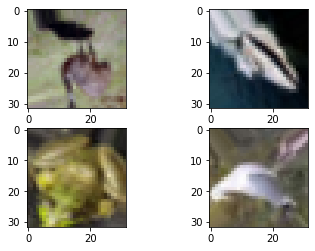

In [16]:
datagen = ImageDataGenerator(rotation_range=180)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train , batch_size =4 , seed =499):
  for i in range(0,4):
    pyplot.subplot(220 +1+i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

# Dikeyde kaydırma

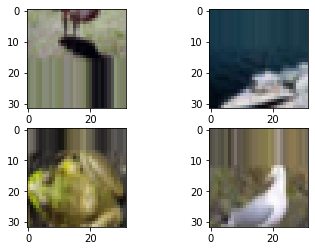

In [17]:
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train , batch_size =4 , seed =499):
  for i in range(0,4):
    pyplot.subplot(220 +1+i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

# yatayda simetrriğini alma

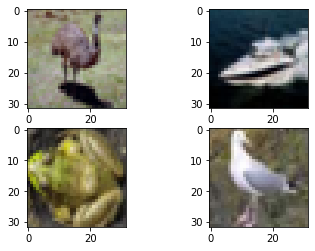

In [19]:
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train , batch_size =4 , seed =499):
  for i in range(0,4):
    pyplot.subplot(220 +1+i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break